# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
import datetime
import json
from config import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1750)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1750)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

## Generate Cities List

In [ ]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
count = 0
city_names = []
clouds = []
countries = []
dates = []
humidities = []
latitudes = []
longitudes = []
max_temps = []
wind_speeds = []
for city in cities:
    try:
        query = f"{base_url}appid={api_key}&units={units}&q="
        response = requests.get(query + city).json()
        count = count + 1
        print(f"Processing Record {count} | {city}")
        country = response["sys"]["country"]
        latitude = response["coord"]["lat"]
        longitude = response["coord"]["lon"]
        date = response["dt"]
        temp = 1.8*(response["main"]["temp_max"]) + 32
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = 2.236936*(response["wind"]["speed"])
        city_names.append(city)
        latitudes.append(latitude)
        longitudes.append(longitude)
        countries.append(country)
        dates.append(date)
        max_temps.append(temp)
        humidities.append(humidity)
        clouds.append(cloudiness)
        wind_speeds.append(wind_speed)
        
    except KeyError:
        print("Couldn't locate data. Skipping city!")
           
weather_data = {"City": city_names,
                "Cloudiness": clouds,
                "Country": countries,
                "Date": dates,
                "Humidity": humidities,
                "Lat": latitudes,
                "Lng": longitudes,
                "Max Temp": max_temps,
                "Wind Speeds": wind_speeds}
weather_reports = pd.DataFrame(weather_data)
weather_reports[["Max Temp", "Wind Speeds"]] = weather_reports[["Max Temp", "Wind Speeds"]].apply(pd.to_numeric)
weather_reports["Max Temp"] = weather_reports["Max Temp"].map("{:.2f}".format)
weather_reports["Wind Speeds"] = weather_reports["Wind Speeds"].map("{:.2f}".format)
weather_reports
    

Processing Record 1 | necochea
Processing Record 2 | walvis bay
Processing Record 3 | itarema
Processing Record 4 | yanam
Processing Record 5 | aksarka
Processing Record 6 | chokurdakh
Processing Record 7 | klaksvik
Processing Record 8 | punta arenas
Processing Record 9 | albany
Processing Record 10 | mataura
Processing Record 11 | tiptur
Processing Record 12 | kabare
Processing Record 13 | attawapiskat
Couldn't locate data. Skipping city!
Processing Record 14 | komsomolskiy
Processing Record 15 | jamestown
Processing Record 16 | taolanaro
Couldn't locate data. Skipping city!
Processing Record 17 | pevek
Processing Record 18 | butaritari
Processing Record 19 | la ronge
Processing Record 20 | hay river
Processing Record 21 | tocopilla
Processing Record 22 | sobolevo
Processing Record 23 | mecca
Processing Record 24 | derzhavinsk
Processing Record 25 | port elizabeth
Processing Record 26 | tasiilaq
Processing Record 27 | mexico
Processing Record 28 | new norfolk
Processing Record 29 | at

Processing Record 225 | talnakh
Processing Record 226 | coihaique
Processing Record 227 | burnie
Processing Record 228 | matara
Processing Record 229 | fare
Processing Record 230 | sept-iles
Processing Record 231 | delemont
Processing Record 232 | krasnoselkup
Processing Record 233 | pierre
Processing Record 234 | freetown
Processing Record 235 | cherskiy
Processing Record 236 | madimba
Processing Record 237 | muros
Processing Record 238 | upata
Processing Record 239 | bilibino
Processing Record 240 | yambio
Processing Record 241 | kamskiye polyany
Processing Record 242 | avera
Processing Record 243 | belaya gora
Processing Record 244 | sobolivka
Processing Record 245 | den helder
Processing Record 246 | kerteh
Couldn't locate data. Skipping city!
Processing Record 247 | norman wells
Processing Record 248 | upernavik
Processing Record 249 | hauterive
Processing Record 250 | atar
Processing Record 251 | melbu
Processing Record 252 | puerto escondido
Processing Record 253 | barra do garc

In [ ]:
converted_dates = []
for date in dates:
    converted_date = datetime.datetime.fromtimestamp(date).strftime("%m/%d/%Y")
    converted_dates.append(converted_date)
    
weather_reports["Converted Date"] = converted_dates
weather_reports = weather_reports[["City", 
                                   "Cloudiness", 
                                   "Country", 
                                   "Date", 
                                   "Converted Date", 
                                   "Humidity", 
                                   "Lat", 
                                   "Lng", 
                                   "Max Temp", 
                                   "Wind Speeds"]]
plot_date = weather_reports.loc[0, "Converted Date"]
plt.scatter(weather_reports["Lat"], weather_data["Max Temp"], facecolor="#66CDAA", edgecolor="black")
plt.title(f"City Latitude vs. Max Temperature ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()
print("The above scatter plot shows the relationship between the latitude of cities and their maximum temperatures, as recorded on June 14, 2020.")


In [ ]:
plt.scatter(weather_reports["Lat"], weather_data["Humidity"], facecolor="#E3CF57", edgecolor="black")
plt.title(f"City Latitude vs. Humidity ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
print("The above scatter plot shows the relationship between the latitude of cities and their humidity, as recorded on June 14, 2020.")


In [ ]:
plt.scatter(weather_reports["Lat"], weather_data["Cloudiness"], facecolor="#838B8B", edgecolor="black")
plt.title(f"City Latitude vs. Humidity ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()


In [ ]:
print("The above scatter plot shows the relationship between the latitude of cities and their cloudiness, as recorded on June 14, 2020.")
plt.scatter(weather_reports["Lat"], weather_data["Wind Speeds"], facecolor="#6495ED", edgecolor="black")
plt.title(f"City Latitude vs. Wind Speeds ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()
print("The above scatter plot shows the relationship between the latitude of cities and wind speeds, as recorded on June 14, 2020.")

In [ ]:
# Northern DF
northern_df = weather_reports.loc[weather_reports["Lat"] > 0,:]
print(northern_df)


In [ ]:
# Southern DF
southern_df = weather_reports.loc[weather_reports["Lat"] < 0,:]
southern_df.head()

In [ ]:
# Set X and Y vals
x_values = northern_df["Max Temp"].astype(float)
y_values = northern_df["Lat"].astype(float)
# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)
# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# To add the equation to your plot:
plt.annotate(line_eq,(30,10),fontsize=15,color="red")
# Make Labels
plt.xlabel("Max Temp (F)")
plt.ylabel("Latitude")
plt.show()

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots


In [18]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

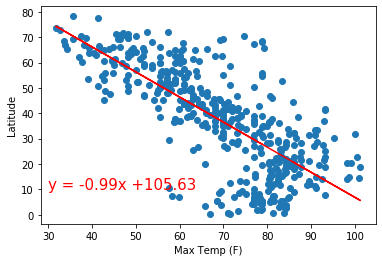

In [19]:
# Set X and Y vals
x_values = northern_df["Max Temp"].astype(float)
y_values = northern_df["Lat"].astype(float)
# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)
# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# To add the equation to your plot:
plt.annotate(line_eq,(30,10),fontsize=15,color="red")
# Make Labels
plt.xlabel("Max Temp (F)")
plt.ylabel("Latitude")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

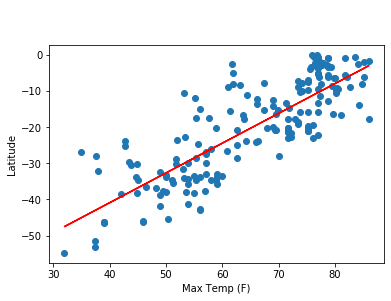

In [20]:
# Set X and Y vals
x_values = southern_df["Max Temp"].astype(float)
y_values = southern_df["Lat"].astype(float)
# Run regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(regress_values)
# To add regress line to your plot:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# To add the equation to your plot:
plt.annotate(line_eq,(30,10),fontsize=15,color="red")
# Make Labels
plt.xlabel("Max Temp (F)")
plt.ylabel("Latitude")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression